In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: akses datset weather_classification_data.csv pada google drive di dataset/weather/weather_classification_data.csv

# import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

# Assuming the file is at /content/drive/MyDrive/dataset/weather/weather_classification_data.csv
# Adjust the path if your file is located elsewhere in your Google Drive.

try:
  df = pd.read_csv('/content/drive/MyDrive/dataset/weather/weather_classification_data.csv')
  print(df.head()) # Display the first few rows of the dataframe
  print(df.describe())
  print(df.info())
except FileNotFoundError:
  print("Error: File not found. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
        Temperature 

In [ ]:
# prompt: hapus kolom Precipitation (%) , Cloud Cover,  Wind Speed ,  Visibility (km),  Location . pada dateset karena tidak digunakan

df = df.drop(['Precipitation (%)', 'Cloud Cover', 'Wind Speed', 'Visibility (km)', 'Location'], axis=1)
print(df.head()) # Display the first few rows of the dataframe
print(df.describe())
print(df.info())

   Temperature  Humidity  Atmospheric Pressure  UV Index  Season Weather Type
0         14.0        73               1010.82         2  Winter        Rainy
1         39.0        96               1011.43         7  Spring       Cloudy
2         30.0        64               1018.72         5  Spring        Sunny
3         38.0        83               1026.25         7  Spring        Sunny
4         27.0        74                990.67         1  Winter        Rainy
        Temperature      Humidity  Atmospheric Pressure      UV Index
count  13200.000000  13200.000000          13200.000000  13200.000000
mean      19.127576     68.710833           1005.827896      4.005758
std       17.386327     20.194248             37.199589      3.856600
min      -25.000000     20.000000            800.120000      0.000000
25%        4.000000     57.000000            994.800000      1.000000
50%       21.000000     70.000000           1007.650000      3.000000
75%       31.000000     84.000000         

In [ ]:
# prompt: ubah data ketegorical menjadi menjadi numerical

from sklearn.preprocessing import LabelEncoder

# Assuming 'Weather' is the categorical column you want to convert
le = LabelEncoder()
df['Weather Type'] = le.fit_transform(df['Weather Type'])
df['Season'] = le.fit_transform(df['Season'])

df['Cloud Cover'] = le.fit_transform(df['Cloud Cover'])
df['Location'] = le.fit_transform(df['Location'])

print(df.head())
print(df.info())

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            3   
1         39.0        96         8.5               71.0            3   
2         30.0        64         7.0               16.0            0   
3         38.0        83         1.5               82.0            0   
4         27.0        74        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       3              3.5         1   
1               1011.43         7       1             10.0         1   
2               1018.72         5       1              5.5         2   
3               1026.25         7       1              1.0         0   
4                990.67         1       3              2.5         2   

   Weather Type  
0             1  
1             0  
2             3  
3             3  
4             1  
<class 'pandas.core.frame.

In [ ]:
# prompt: Pisahkan Label dan fitur

# Separate features (X) and target variable (y)
X = df.drop('Weather Type', axis=1)  # Features are all columns except 'Weather Type'
y = df['Weather Type']  # Target variable is 'Weather Type'

print(X.head())
print(y.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            3   
1         39.0        96         8.5               71.0            3   
2         30.0        64         7.0               16.0            0   
3         38.0        83         1.5               82.0            0   
4         27.0        74        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
0               1010.82         2       3              3.5         1  
1               1011.43         7       1             10.0         1  
2               1018.72         5       1              5.5         2  
3               1026.25         7       1              1.0         0  
4                990.67         1       3              2.5         2  
0    1
1    0
2    3
3    3
4    1
Name: Weather Type, dtype: int64


In [ ]:
# prompt: split dataset yang dibunakan menjadi 80% untuk training dan 20% untuk testing

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10560, 10)
X_test shape: (2640, 10)
y_train shape: (10560,)
y_test shape: (2640,)


In [ ]:
# prompt: lakukan pelatihan dengan model ANN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) # Input layer with 64 neurons
model.add(Dense(32, activation='relu')) # Hidden layer with 32 neurons
model.add(Dense(len(y_train.unique()), activation='softmax')) # Output layer with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions (optional)
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1) # Convert probabilities to class labels

print(classification_report(y_test, y_pred_classes))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3922 - loss: 13.9213 - val_accuracy: 0.6155 - val_loss: 1.0157
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7011 - loss: 0.9780 - val_accuracy: 0.8381 - val_loss: 0.6289
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7585 - loss: 0.7843 - val_accuracy: 0.7973 - val_loss: 0.5817
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7848 - loss: 0.7110 - val_accuracy: 0.8617 - val_loss: 0.5312
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7653 - loss: 0.7334 - val_accuracy: 0.8286 - val_loss: 0.6076
Epoch 6/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7784 - loss: 0.7229 - val_accuracy: 0.8475 - val_loss: 0.5082
Epoch 7/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.6469 - val_accuracy: 0.8627 - val_loss: 0.4957
Epoch 8/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8262 - loss: 0.5740 - val_accuracy: 0.8589 - val

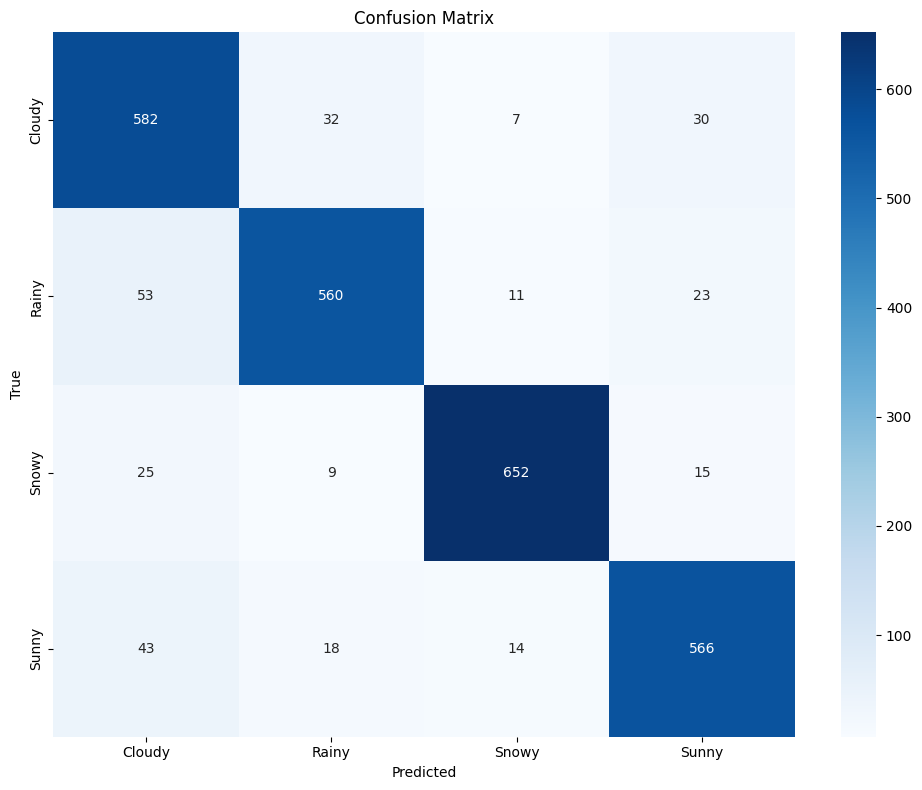

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan kelas yang diinginkan
classes = ['Cloudy', 'Rainy', 'Snowy', 'Sunny']

# Calculate the confusion matrix - This line is missing in the original code
cm = confusion_matrix(y_test, y_pred_classes) # Assuming y_test and y_pred_classes are defined from previous cells

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: simpan model dalam format .tflite dan simpan di google drive

import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to your Google Drive
with open('/content/drive/MyDrive/dataset/weather/weather_Fulldata-classification_model.tflite', 'wb') as f:
  f.write(tflite_model)

print("TFLite model saved to /content/drive/MyDrive/weather_classification_model.tflite")

Saved artifact at '/tmp/tmpkx06bazc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136843842409520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843501933088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843501938016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843501929216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843501939424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843501940304: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved to /content/drive/MyDrive/weather_classification_model.tflite
